<a href="https://colab.research.google.com/github/beliabaez/CE888_2020/blob/master/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:


%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv", delimiter = ";")
features = ["age", "job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "campaign", "pdays", "previous", "poutcome", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
outcomes = ["y"]

outcomes_of_interested = ["y"]





In [0]:

df_dummies = pd.get_dummies(df)
df_dummies.drop(['y_no', 'duration'], 1, inplace = True)



(array([36548.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4640.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

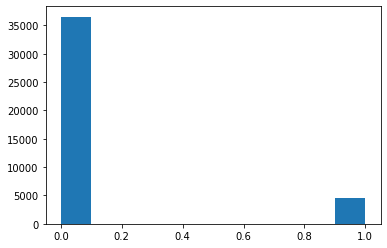

In [55]:
#plot histogram
x = df_dummies["y_yes"]
plt.hist(x)

In [67]:

X = df_dummies.drop(["y_yes"],axis = 1).copy().values
y = df_dummies["y_yes"].copy().values
clf = ExtraTreesClassifier(n_estimators=100, max_depth=4)
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=10,scoring = make_scorer(acc))

print("ACC: %0.2f +/- %0.2f" % (scores.mean(), scores.std()))

ACC: 0.81 +/- 0.16


In [69]:
features = df_dummies.drop(["y_yes"],axis = 1).columns
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
   print("%d. %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))


Feature ranking:
1. pdays (0.182800)
2. poutcome_success (0.155034)
3. nr.employed (0.140961)
4. emp.var.rate (0.136517)
5. euribor3m (0.099148)
6. cons.price.idx (0.034192)
7. poutcome_nonexistent (0.030765)
8. contact_telephone (0.022980)
9. month_mar (0.019709)
10. month_oct (0.019472)
11. previous (0.018145)
12. cons.conf.idx (0.017926)
13. month_may (0.017666)
14. contact_cellular (0.016146)
15. poutcome_failure (0.015079)
16. month_sep (0.013181)
17. month_jul (0.007025)
18. default_no (0.006835)
19. age (0.005492)
20. job_retired (0.005488)
21. month_nov (0.004765)
22. job_blue-collar (0.004375)
23. month_jun (0.004215)
24. job_student (0.003636)
25. month_apr (0.003001)
26. default_unknown (0.002673)
27. month_aug (0.002471)
28. month_dec (0.002011)
29. day_of_week_mon (0.001382)
30. education_basic.9y (0.000753)
31. education_university.degree (0.000653)
32. marital_single (0.000649)
33. job_services (0.000606)
34. campaign (0.000562)
35. marital_married (0.000324)
36. job_unk

In [71]:
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

print (cnf_matrix)

[[36289   259]
 [ 3899   741]]
